<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### K-means Clustering

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Machine Learning in Python: A Hands-on Guide with Code* [e-book]. Zenodo. doi:10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository* (0.0.3) [Software]. Zenodo. DOI: 10.5281/zenodo.13835312. GitHub repository: https://github.com/GeostatsGuy/MachineLearningDemos [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **K-means Clustering**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Cluster Analysis](https://youtu.be/oFE10cLl0Fs?si=AwmYnrYggtYWGV2n)
* [Issues with k-Means Clustering](https://youtu.be/ysJw8M_J40I?si=EIlg2941QrfAt7zE)
* [Density-based Clustering](https://www.youtube.com/watch?v=3GaLe8HaDMc&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=15)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation for Cluster Analysis

Mixing distinct populations to train prediction models often reduces model accuracy.

* clustering is an inferential machine learning method to automate the segmentation of the dataset into separate groups, known as clusters and specified by an integer index.

* the computer does not provide meaning nor description of the groups, that is our job!

We need to learn and segment distinct populations to improve our prediction models, 

<figure style="text-align: center;">
  <img src="_static/cluster/cluster1.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Example dataset divided into 5 groups.
</figcaption>
</figure>

Yet, the above figure is misleading. If we calculate the boundaries as shown above, we would actually have a predictive classification model for the any new cases, 

* given normalized porosity of 0.7 and noramlized acoustic impedance of 0.18 classify as group #5

Clustering does not do this, it is an inferential, unsupervised machine learning method,

* it is learning structures in the data

* clustering assigns labels to the data 

<figure style="text-align: center;">
  <img src="_static/cluster/cluster2.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Example dataset with the 5 groups labels assigned with clustering indicated by color.
</figcaption>
</figure>

#### Inferential Machine Learning

There are no response features, $y$, just predictor features,

$$
𝑋_1,\ldots,𝑋_𝑚
$$

* Machine learns by mimicry a compact representation of the data
  
* Captures patterns as feature projections, group assignments, neural network latent features, etc.
  
* We focus on inference of the population, the natural system, instead of prediction of response features.

#### K-Means Clustering

The K-means clustering approach is primarily applied as an unsupervised machine learning method for clustering, group assignment to unlabeled data, where dissimilarity within clustered groups is minimized. The loss function that is minimized for K-means clustering, known as intertia, is,

$$ 
J = \sum^k_{i=1} \sum_{\alpha \in C_i} || X_{\alpha} - \mu_i ||
$$

where $i$ is the cluster index, $\alpha$ is the data sample index, $X$ is the data sample and $\mu_i$ is the $i$ cluster prototype, $k$ is the total number of clusters, and $|| X_m - \mu_m ||$ is the Euclidean distance from a sample to the cluster prototype in $M$ dimensional space calculated as:

$$
|| X_{m,\alpha} - \mu_i || =  \sqrt{ \sum_m^M \left( X_{m,\alpha} - \mu_{m,i} \right)^2 }
$$

Here's a schematic illustration of this loss function, summing the distances between group prototypes and the samples in the groups, 

<figure style="text-align: center;">
  <img src="_static/cluster/cluster_loss.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Schematic of the K-means clustering loss function, intertia. Note, for clarity only some of the distances from samples to prototypes are annotated and some of the data labels are included.
</figcaption>
</figure>

Here is a summary of import aspects for K-means clustering:

* **Prototype Method** - represents the training data with number of synthetic cases in the features space. For K-means clustering we assign and iteratively update $K$ prototypes.

* **Iterative Solution** - the initial prototypes are assigned randomly in the feature space, the labels for each training sample are updated to the nearest prototype, then the prototypes are adjusted to the centroid of their assigned training data, repeat until there is no further update to the training data assignments.

* **Unsupervised Learning** - the training data are not labeled and are assigned $K$ labels based on their proximity to the prototypes in the feature space. The idea is that similar things, proximity in feature space, should belong to the same cluster group.  

* **Feature Weighting** - the procedure depends on the Euclidian distance between training samples and prototypes in feature space. Distance is treated as the 'inverse' of similarity. If the features have significantly different magnitudes, the feature(s) with the largest magnitudes and ranges will dominate the loss function and cluster groups will become anisotropic aligned orthogonal to the high range feature(s). While the common approach is to standardize / normalize the variables, by-feature weighting may be applied through unequal variances. Note, in this demonstration we normalize the features to range from 0.0 to 1.0. 

#### Solution Heuristic

Let's first define a solution heuristic,

* **Heuristic** - a shortcut the sacrifices accuracy for practicality, i.e., the solution is usually good enough and has a reasonable run time. 

For the K-means clustering problem of assigning one of $k$ categorical labels to $n$ sample data, the solution space includes,

$$
k^n
$$

possible solutions.

The k-means clustering solution heuristic includes these steps:

1. Assign initial random prototype with labels.

<figure style="text-align: center;">
  <img src="_static/cluster/random.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> \(k\) random prototypes.
</figcaption>
</figure>

2. Assign samples to the nearest prototype.

<figure style="text-align: center;">
  <img src="_static/cluster/assign.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Assign samples to the \(k\) nearest prototypes.
</figcaption>
</figure>

4. Update prototype based on centroids of samples belonging to this prototype.

<figure style="text-align: center;">
  <img src="_static/cluster/correct.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Update \(k\) prototypes to centroids of assigned data.
</figcaption>
</figure>

6. Iterate (return to step 2) until no sample assignments change (prototypes stop moving).

<figure style="text-align: center;">
  <img src="_static/cluster/repeat.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Assignment and update iterations until heuristic solution convergence.
</figcaption>
</figure>

#### Demonstration 

I start with a 'by-hand' approach to calculate the K-means clustering group assignments. 

* this allows us to be able to watch the method in action, as opposed to just getting a result. I think this is more instructive.

* afterwards, I show the function from scikit-learn to complete the calculation in one line of code.

I have also developed a set of [interactive k-means clustering dashboards](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_kMeans_Clustering.ipynb) to explore the k-mean clustering heuristic, including this one that shows each solution for multiple random prototypes and the cumulative distribution function of intertia to explore the consistency in the solution. 

<figure style="text-align: center;">
  <img src="_static/cluster/interactive_clustering.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Interactive Python dashboard to explore the performance of the k-means clustering solution heuristic.
</figcaption>
</figure>

Note, for the workflow below I have modified code from the tutorial provided by Ben Keen as functions to take care of the steps (assign training data to the nearest prototype, update the prototype to the centroid of the assigned data).  

* The original tutorial is available at [here](http://benalexkeen.com/k-means-clustering-in-python).

* My modifications tailor this workflow for my specific example, and to include the normalized and original data. Appreciation to Ben!

#### Load the Required Libraries

The following code loads the required libraries. These should have been installed with Anaconda 3.

In [1]:
ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import copy                                                   # for deep copies
import os                                                     # set working directory, run executables
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
import matplotlib.ticker as mtick                             # control tick label formatting
from sklearn.metrics import silhouette_score                  # calculating the optimum K number of clusters
from sklearn.cluster import KMeans                            # k-means clustering
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map
seed = 42                                                     # random number seed

#### Declare Functions

The following functions perform the steps required by K-means clustering.

* assign the training data to the nearest prototype

* update the prototype to the centroid of the assigned training data

Don't be concerned if you don't understand the code, we have used some advanced approaches for the benefit of concise code.

I also added a convenience function to add major and minor gridlines to improve plot interpretability.

In [2]:
# Assignment function to assigned training data to the nearest prototype (code modified from Ben Keen, http://benalexkeen.com/k-means-clustering-in-python/)
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (                  # use the normalized features and centroids
            np.sqrt(
                (df['Norm_Porosity'] - centroids[i][2]) ** 2
                + (df['Norm_AI'] - centroids[i][3]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return

# Update function to shift the prototype to the centroid of the training data assigned to the prototype (code modified from Ben Keen, http://benalexkeen.com/k-means-clustering-in-python/)
def update(df,centroids,x1min,x1max,x2min,x2max):
    for i in centroids.keys():
        centroids[i][2] = np.mean(df[df['closest'] == i]['Norm_Porosity'])
        centroids[i][3] = np.mean(df[df['closest'] == i]['Norm_AI'])
        centroids[i][0] = centroids[i][2] * (x1max-x1min) + x1min
        centroids[i][1] = centroids[i][3] * (x2max-x2min) + x2min
    return

def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [3]:
#os.chdir("C:/PGE383")                                        # set the working directory with the input data file

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

Let's load the provided multivariate, spatial dataset '12_sample_data.csv'. It is a comma delimited file with: 

* X and Y coordinates ($m$)
* facies 0 and 1 
* porosity (fraction)
* permeability ($mD$)
* acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^3$). 

We load it with the pandas 'read_csv' function into a DataFrame we called 'df' and then preview it to make sure it loaded correctly.

**Python Tip: using functions from a package** just type the label for the package that we declared at the beginning:

```python
import pandas as pd
```

so we can access the pandas function 'read_csv' with the command: 

```python
pd.read_csv()
```

but read csv has required input parameters. The essential one is the name of the file. For our circumstance all the other default parameters are fine. If you want to see all the possible parameters for this function, just go to the docs [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).  

* The docs are always helpful
* There is often a lot of flexibility for Python functions, possible through using various inputs parameters

also, the program has an output, a pandas DataFrame loaded from the data. So we have to specify the name / variable representing that new object.

```python
df = pd.read_csv("12_sample_data.csv")  
```

Let's run this command to load the data and then this command to extract a random subset of the data.

```python
df = df.sample(frac=.30, random_state = 73073); 
df = df.reset_index()
```

We do this to reduce the number of data for ease of visualization (hard to see if too many points on our plots).

In [4]:
#df = pd.read_csv('12_sample_data.csv')                       # load our data table from the current directory
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_sample_data.csv') # or from GtiHub
df = df.iloc[:,1:]                                            # remove a null column 
df = df.sample(frac=.30, random_state = seed); df = df.reset_index(drop=True) # extract 30% random to reduce the number of data

#### Summary Statistics for Tabular Data

The table includes porosity (fraction) and acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^3$) that we will work with in the demonstration below.

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [5]:
df.describe().transpose()                                     # DataFrame summary statistics

,count,mean,std,min,25%,50%,75%,max
X,144.0,3910.668909,2563.309885,6.161100,1978.194998,3500.392517,5502.096026,9703.495538
Y,144.0,5093.498955,2861.683625,491.789431,2503.509193,5393.325918,7596.505416,9897.863401
Facies,144.0,0.618056,0.487559,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,144.0,0.191045,0.031262,0.133681,0.165889,0.185460,0.220655,0.261091
Perm,144.0,568.892892,1265.582175,0.035608,9.382939,64.000905,425.323240,7452.343369
AI,144.0,3749.924448,821.100292,1746.387548,3131.159498,3686.800017,4292.981181,5725.525232


#### Normalize the Features

The two features are quite incompatible.  They have dramatically different:

* variances / ranges

We should normalize each feature to range between 0 to 1. The equation is:

$$
x_i^{\prime} = \frac{ \left( x_i - min(x) \right)}{\left( max(x) - min(x) \right)} \quad i = 1,\ldots,n
$$

* This is a distribution, shift, stretch or squeeze without any distribution shape change.

Now we can use these normalized values for calculating distance in our workflow:

* to remove the influence of magnitude and range on our similarity calculation

In [6]:
pormin = df['Porosity'].min(); pormax = df['Porosity'].max()  # find min and max for each feature
AImin = df['AI'].min(); AImax = df['AI'].max()

df['Norm_Porosity'] = (df['Porosity']-pormin)/(pormax - pormin) # normalize each feature, this broadcasts over all samples in the DataFrame
df['Norm_AI'] = (df['AI']-AImin)/(AImax - AImin)                            # and appends a new normalized feature for each 

Of course there is a normalize function in scikit-learn, but we did this 'by-hand' this first time to ensure the operation is perfectly clear.

````python
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
````

Let's confirm that our normalized porosity and acoustic impedance now range between 0 and 1.

In [7]:
df.describe().transpose()                                     # summary statistics for the DataFrame

,count,mean,std,min,25%,50%,75%,max
X,144.0,3910.668909,2563.309885,6.161100,1978.194998,3500.392517,5502.096026,9703.495538
Y,144.0,5093.498955,2861.683625,491.789431,2503.509193,5393.325918,7596.505416,9897.863401
Facies,144.0,0.618056,0.487559,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,144.0,0.191045,0.031262,0.133681,0.165889,0.185460,0.220655,0.261091
Perm,144.0,568.892892,1265.582175,0.035608,9.382939,64.000905,425.323240,7452.343369
AI,144.0,3749.924448,821.100292,1746.387548,3131.159498,3686.800017,4292.981181,5725.525232
Norm_Porosity,144.0,0.450230,0.245367,0.000000,0.252789,0.406397,0.682631,1.000000
Norm_AI,144.0,0.503510,0.206351,0.000000,0.348008,0.487646,0.639986,1.000000


#### Extract Features of Interest

Now let's slice out the porosity and acoustic impedance features and then look at the resulting DataFrame to ensure that we loaded and reformatted as expected. 

* I often separate only the feature of interest to simplify my workflows and to reduce the probability of blunders, such as accidentally referring to a feature not being used in the current workflow!

* Beware, this is a shallow copy; therefore, any changes to the df_subset DataFrame will be reflected in the original df DataFrame. The slice is actually a reference to the original DataFrame in memory.

In [8]:
df_subset = df.iloc[:,[3,5,6,7]]                              # extract Porosity and AI for a simple 2D example
df_subset.head()                                              # preview the new DataFrame

,Porosity,AI,Norm_Porosity,Norm_AI
0,0.252772,2862.446918,0.934709,0.280478
1,0.181580,2919.237330,0.375944,0.294750
2,0.230303,2999.248935,0.758358,0.314858
3,0.163732,3823.747676,0.235860,0.522063
4,0.197078,4609.845251,0.497583,0.719618


#### Infer Model Parameters

From the summary statistics we can assign a reasonable minimum and maximum for each feature.  

* We will use this for plotting.

We will also set the random number seed to ensure that the program does the same thing every time it is run.

* Change the seed number for a different result

We will set the number of prototypes / clusters, *K*

We define a dictionary with the color code for each cluster, $k = 1,\ldots,K$.  Given 7 codes currently, there will be an error if $K$ is set larger than 7.  Add more color codes to the dictionary to allow for more categories.

In [12]:
por_min = 0.12; por_max = 0.28                                # min and max values for plotting
AI_min = 1500; AI_max = 6500                                  
K = 6; max_iter = 100                                         # number of prototypes / categories
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'm', 5: 'c', 6: 'k', 7: 'w'} # color dictionary for up to 7 categories
prototypes = np.zeros((K,max_iter,2))                         # store the prototypes over iterations
norm_prototypes = np.zeros((K,max_iter,2))                    # store the prototypes for the standardized features over iterations

#### Visualize the Training Data

In this exercise, we want to use K-means clustering provide facies based on acoustic impedance and porosity predictor features. 

* This allows use to group rock with similar petrophysical and geophysical properties.

Let's start by looking at the scatterplot of our training data features, porosity and acoustic impedance.  

* We will look at the data in original units and normalized units through this entire exercise.

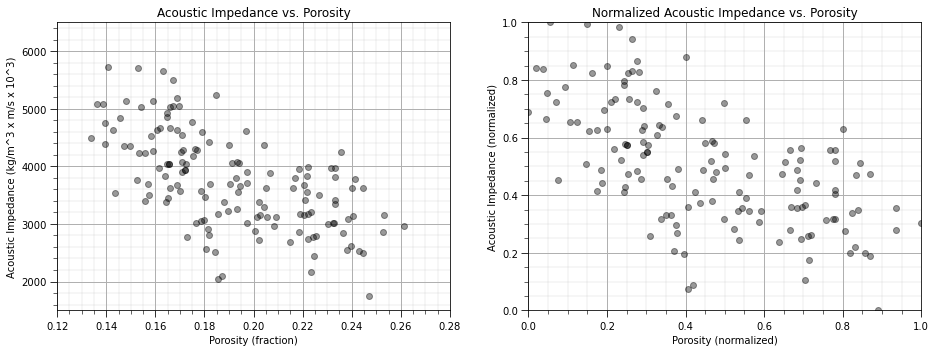

In [13]:
plt.subplot(121)                                              # scatter plot our training data 
plt.scatter(df_subset['Porosity'], df['AI'], c="black", alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('Acoustic Impedance vs. Porosity'); plt.xlabel('Porosity (fraction)'); plt.ylabel('Acoustic Impedance (kg/m^3 x m/s x 10^3)')
plt.xlim(por_min, por_max); plt.ylim(AI_min, AI_max); add_grid();

plt.subplot(122)                                              # scatter plot our normalized training data  
plt.scatter(df_subset['Norm_Porosity'], df['Norm_AI'], c="black", alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('Normalized Acoustic Impedance vs. Porosity'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Acoustic Impedance (normalized)')
plt.xlim(0.0,1.0); plt.ylim(0.0,1.0); add_grid();
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Calculating k-Means Clustering By-hand

Here's the steps to calculate k-means clusters for our unlabelled dataset.

##### Initialize k Prototypes

First we will assign k prototypes in the feature space randomly.

* for K prototypes assign a random porosity and acoustic impedance

* don't worry, these prototypes won't make much sense initially, but they will improve

We will do this and then visualize the prototypes as red, green, blue etc. dots.

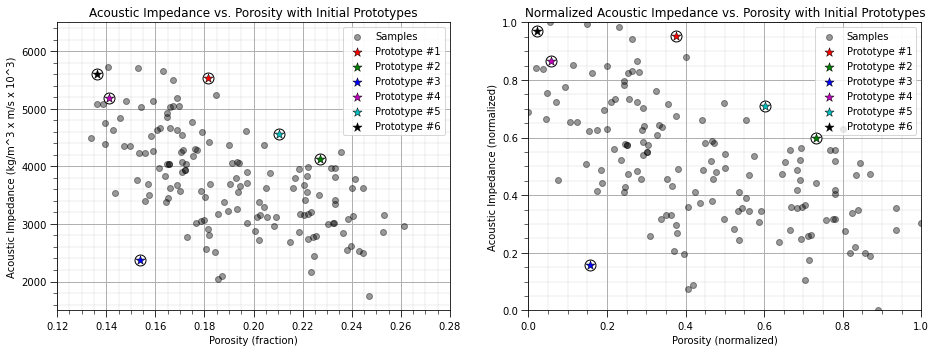

In [14]:
np.random.seed(seed)                                          # random number seed for repeatability of the results
centroids = {}
for i in range(K):                                            # Assign Initial Prototypes 
    norm_por = np.random.random(); por = norm_por * (pormax-pormin) + pormin
    norm_AI = np.random.random(); AI = norm_AI * (AImax-AImin) + AImin
    centroids[i+1] = [por,AI,norm_por,norm_AI]; prototypes[i,0] = [por,AI]; norm_prototypes[i,0] = [norm_por,norm_AI]

plt.subplot(121)                                              # plot the training data and K prototypes
plt.scatter(df_subset['Porosity'], df['AI'],c="black",alpha = 0.4,linewidths=1.0,edgecolors="black",zorder=1,label='Samples')
for i in centroids.keys():
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=20,
                label='Prototype #'+str(i))
plt.title('Acoustic Impedance vs. Porosity with Initial Prototypes'); plt.xlabel('Porosity (fraction)')
plt.ylabel('Acoustic Impedance (kg/m^3 x m/s x 10^3)')
plt.xlim(por_min, por_max); plt.ylim(AI_min, AI_max); add_grid(); plt.legend(loc='upper right')

plt.subplot(122)                                              # plot the training data and K prototypes
plt.scatter(df_subset['Norm_Porosity'], df['Norm_AI'], c="black", alpha = 0.4, linewidths=1.0, edgecolors="black",label='Samples')
for i in centroids.keys():
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=20,
                label='Prototype #'+str(i))
plt.title('Normalized Acoustic Impedance vs. Porosity with Initial Prototypes'); plt.xlabel('Porosity (normalized)')
plt.ylabel('Acoustic Impedance (normalized)')
plt.xlim([0, 1]); plt.ylim([0, 1]); add_grid(); plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

##### Assignment of Training Data

All training data are assigned to the nearest prototype.  

* recall we have a function to do this

```python
df = assignment(df, centroids) 
```

* we work with the normalized features and visualize normalized and original features

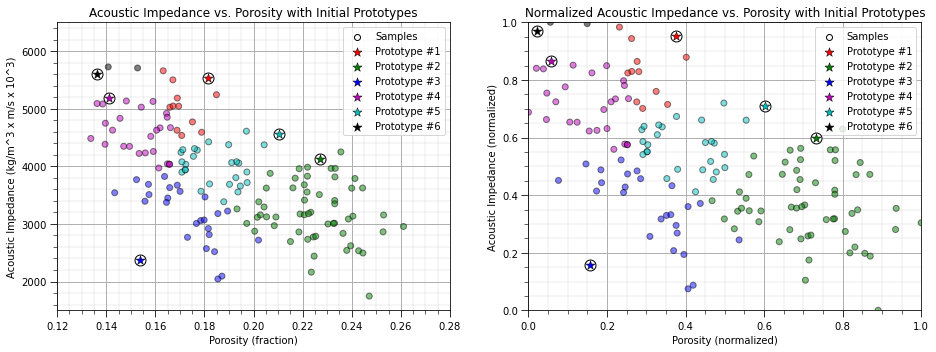

In [15]:
assignment(df, centroids)                                     # assign training data to the nearest prototype

plt.subplot(121)                                              # plot the assigned training data and K prototypes
plt.scatter(df['Porosity'], df['AI'], color=df['color'], alpha=0.5, edgecolor='k'); plt.scatter(-999,-999,color='white',edgecolors='black',
                label='Samples')
for i in centroids.keys():
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=20,
                label='Prototype #'+str(i))
plt.title('Acoustic Impedance vs. Porosity with Initial Prototypes'); plt.xlabel('Porosity (fraction)')
plt.ylabel('Acoustic Impedance (kg/m^3 x m/s x 10^3)')
plt.xlim(por_min, por_max); plt.ylim(AI_min, AI_max); add_grid(); plt.legend(loc='upper right')

plt.subplot(122)                                              # plot the normalized training data and K prototypes
plt.scatter(df_subset['Norm_Porosity'], df['Norm_AI'], c=df['color'], alpha = 0.5, linewidths=1.0, edgecolors="black")
plt.scatter(-999,-999,color='white',edgecolors='black',label='Samples')
for i in centroids.keys():
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=20,
                label='Prototype #'+str(i))
plt.title('Normalized Acoustic Impedance vs. Porosity with Initial Prototypes'); plt.xlabel('Porosity (normalized)')
plt.ylabel('Acoustic Impedance (normalized)')
plt.xlim([0, 1]); plt.ylim([0, 1]); add_grid(); plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

##### Update the Prototypes

Now we reassign the prototypes to the centroids of the training data belonging to each.

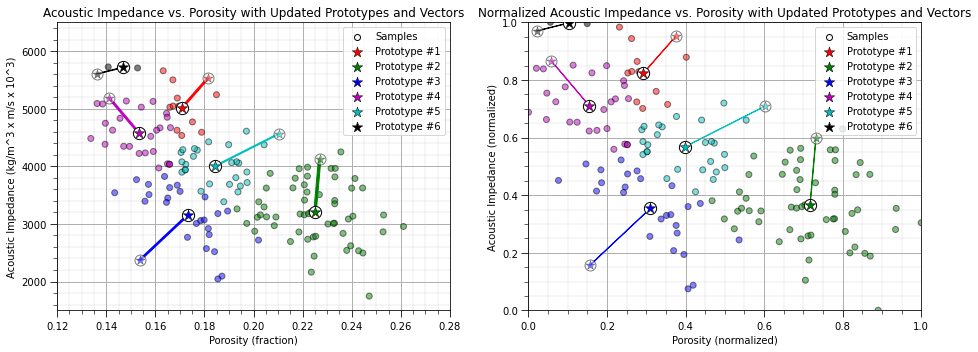

In [16]:
old_centroids = copy.deepcopy(centroids)                      # make a deep copy of the centroids for plotting vectors below
update(df,centroids,pormin,pormax,AImin,AImax)                # update the centroids to the new data assignments

plt.subplot(121)                                              # plot the assigned training data and k prototypes
ax = plt.gca()
plt.scatter(df['Porosity'], df['AI'], color=df['color'], alpha=0.5, edgecolor='k')
plt.scatter(-999,-999,color='white',edgecolors='black',label='Samples')
for i in centroids.keys():
    plt.scatter(old_centroids.get(i)[0], old_centroids.get(i)[1],color='white',s=120,marker='o',linewidths=1.0,alpha=0.5,
            edgecolors="black",zorder=10)
    plt.scatter(old_centroids.get(i)[0], old_centroids.get(i)[1],color=colmap[i],s=90,marker='*',linewidths=0.5,alpha=0.5,
            edgecolors="black",zorder=20)
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color='white',s=150,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color=colmap[i],s=120,marker='*',linewidths=0.5,
            edgecolors="black",zorder=20,label='Prototype #'+str(i))
    prototypes[i-1,1] = [centroids[i][0],centroids[i][1]]; norm_prototypes[i-1,1] = [centroids[i][2],centroids[i][3]]
plt.title('Acoustic Impedance vs. Porosity with Updated Prototypes and Vectors'); plt.xlabel('Porosity (fraction)')
plt.ylabel('Acoustic Impedance (kg/m^3 x m/s x 10^3)')
plt.xlim(por_min, por_max); plt.ylim(AI_min, AI_max); add_grid(); plt.legend(loc='upper right')

for i in old_centroids.keys():                                # plot the vectors
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) 
    dy = (centroids[i][1] - old_centroids[i][1]) 
    ax.arrow(old_x, old_y, dx, dy,fc=colmap[i], ec=colmap[i]); 
    
plt.subplot(122)                                              # plot the normalized assigned training data and k prototypes
ax = plt.gca()
plt.scatter(df['Norm_Porosity'], df['Norm_AI'], color=df['color'], alpha=0.5, edgecolor='k')
plt.scatter(-999,-999,color='white',edgecolors='black',label='Samples')
for i in centroids.keys():
    plt.scatter(old_centroids.get(i)[2], old_centroids.get(i)[3],color='white',s=120,marker='o',linewidths=1.0,alpha=0.5,
        edgecolors="black",zorder=10)
    plt.scatter(old_centroids.get(i)[2], old_centroids.get(i)[3],color=colmap[i],s=90,marker='*',linewidths=0.5,alpha=0.5,
        edgecolors="black",zorder=20)
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color='white',s=150,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color=colmap[i],s=120,marker='*',linewidths=0.5, edgecolors="black",zorder=20,
        label='Prototype #'+str(i))
plt.title('Normalized Acoustic Impedance vs. Porosity with Updated Prototypes and Vectors'); plt.xlabel('Porosity (normalized)')
plt.ylabel('Acoustic Impedance (normalized)')
plt.xlim([0, 1]); plt.ylim([0, 1]); add_grid(); plt.legend(loc='upper right')

for i in old_centroids.keys():                                # plot the vectors
    old_x = old_centroids[i][2]
    old_y = old_centroids[i][3]
    dx = (centroids[i][2] - old_centroids[i][2]) 
    dy = (centroids[i][3] - old_centroids[i][3]) 
    ax.arrow(old_x, old_y, dx, dy,fc=colmap[i], ec=colmap[i])
      
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

##### Repeat the Assignment of the Training Data

Once again we assign the training data to the nearest prototype. 

* Note the prototypes were updated in the previous step so the assignments may change

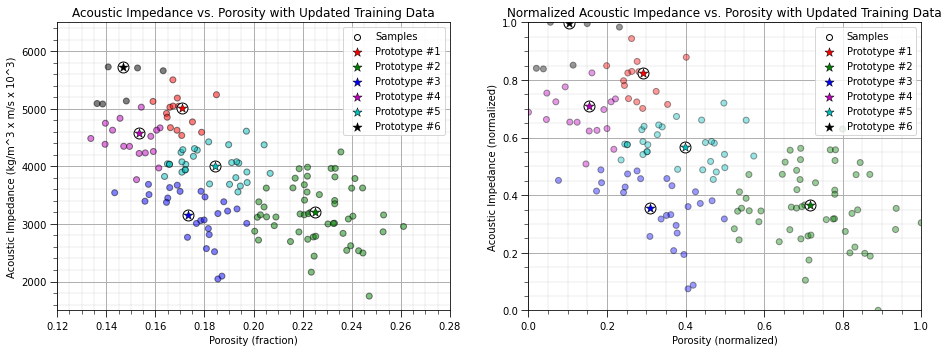

In [17]:
assignment(df, centroids)                                     # assign samples to nearest prototype

plt.subplot(121)                                              # plot the assigned training data and K prototypes
plt.scatter(df['Porosity'], df['AI'], color=df['color'], alpha=0.5, edgecolor='k'); plt.scatter(-999,-999,color='white',
    edgecolors='black',label='Samples')
for i in centroids.keys():
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=20,
            label='Prototype #'+str(i))
plt.title('Acoustic Impedance vs. Porosity with Updated Training Data'); plt.xlabel('Porosity (fraction)')
plt.ylabel('Acoustic Impedance (kg/m^3 x m/s x 10^3)')
plt.xlim(por_min, por_max); plt.ylim(AI_min, AI_max); add_grid(); plt.legend(loc='upper right')

plt.subplot(122)                                              # plot the normalized training data and K prototypes
plt.scatter(df_subset['Norm_Porosity'], df['Norm_AI'], c=df['color'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.scatter(-999,-999,color='white',edgecolors='black',label='Samples')
for i in centroids.keys():
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",
            zorder=20,label='Prototype #'+str(i))
plt.title('Normalized Acoustic Impedance vs. Porosity with Updated Training Data'); plt.xlabel('Porosity (normalized)')
plt.ylabel('Acoustic Impedance (normalized)')
plt.xlim([0, 1]); plt.ylim([0, 1]); add_grid(); plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

##### Iterate Until Convergence 

Now we iterate over the previous set of steps:

* assign the training data to the nearest prototype

* update the prototypes 

We do this until there is no further chance in the category assigned to each of the training data.

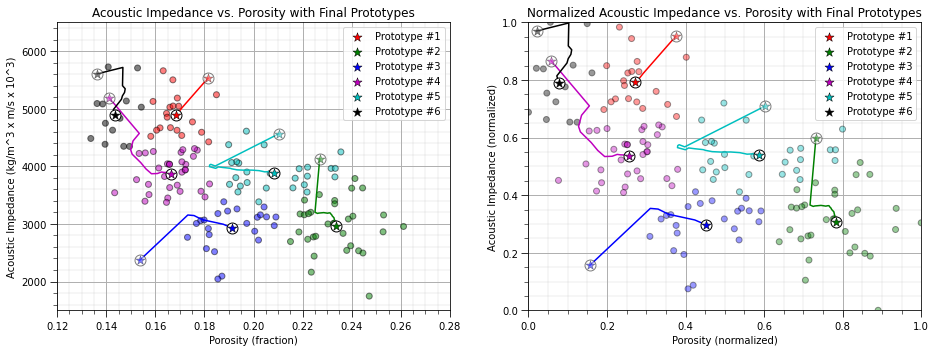

In [18]:
iteration = 2                                                 # initialize a counter, we already completed iteration 0 and 1 above
while True:
    closest_centroids = df['closest'].copy(deep=True)
    update(df,centroids,pormin,pormax,AImin,AImax)
    for i in centroids.keys():
        prototypes[i-1,iteration] = [centroids[i][0],centroids[i][1]]
        norm_prototypes[i-1,iteration] = [centroids[i][2],centroids[i][3]]
    assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
    iteration = iteration + 1

plt.subplot(121)                                              # plot the assigned training data and K prototypes
plt.scatter(df['Porosity'], df['AI'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(prototypes[i-1,0,0], prototypes[i-1,0,1],color='white',s=120,marker='o',linewidths=1.0,alpha=0.5,edgecolors="black",zorder=10)
    plt.scatter(prototypes[i-1,0,0], prototypes[i-1,0,1],color=colmap[i],s=90,marker='*',linewidths=0.5,alpha=0.5,edgecolors="black",zorder=20)
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",
        zorder=20,label='Prototype #'+str(i))
    plt.plot(prototypes[i-1,:iteration+1,0],prototypes[i-1,:iteration+1,1],color=colmap[i],zorder = 1)
plt.title('Acoustic Impedance vs. Porosity with Final Prototypes'); plt.xlabel('Porosity (fraction)')
plt.ylabel('Acoustic Impedance (kg/m^3 x m/s x 10^3)')
plt.xlim(por_min, por_max); plt.ylim(AI_min, AI_max); add_grid(); plt.legend(loc='upper right')

plt.subplot(122)                                              # plot the training data and K prototypes
plt.scatter(df_subset['Norm_Porosity'], df['Norm_AI'], c=df['color'], alpha = 0.4, linewidths=1.0, edgecolors="black")
for i in centroids.keys():
    plt.scatter(norm_prototypes[i-1,0,0], norm_prototypes[i-1,0,1],color='white',s=120,marker='o',linewidths=1.0,alpha=0.5,
            edgecolors="black",zorder=10)
    plt.scatter(norm_prototypes[i-1,0,0], norm_prototypes[i-1,0,1],color=colmap[i],s=90,marker='*',linewidths=0.5,alpha=0.5,
            edgecolors="black",zorder=20)
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",
            zorder=20,label='Prototype #'+str(i))
    plt.plot(norm_prototypes[i-1,:iteration+1,0],norm_prototypes[i-1,:iteration+1,1],color=colmap[i],zorder = 1)
plt.title('Normalized Acoustic Impedance vs. Porosity with Final Prototypes'); plt.xlabel('Porosity (normalized)')
plt.ylabel('Acoustic Impedance (normalized)')
plt.xlim([0, 1]); plt.ylim([0, 1]); add_grid(); plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### k-Means Clustering with the scikit-learn Function

Let's repeat with the scikit-learn function.

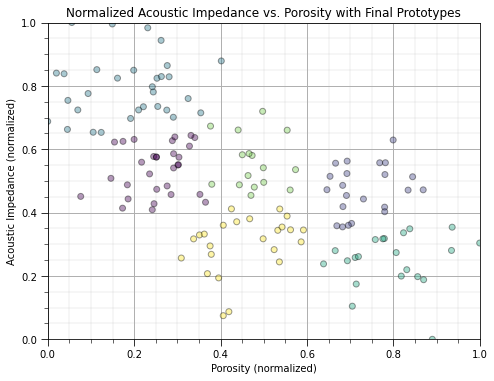

In [19]:
K = 6                                                         # number categories / clusters 

kmeans = KMeans(n_clusters=K, random_state=seed, n_init = 100).fit(df.loc[:,['Norm_Porosity','Norm_AI']]) # k-means clustering
df['kMeans'] = kmeans.labels_ + 1

plt.subplot(111)                                              # plot the training data and K prototypes
plt.scatter(df_subset['Norm_Porosity'], df['Norm_AI'], c=df['kMeans'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('Normalized Acoustic Impedance vs. Porosity with Final Prototypes'); plt.xlabel('Porosity (normalized)')
plt.ylabel('Acoustic Impedance (normalized)')
plt.xlim([0, 1]); plt.ylim([0, 1]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

#### Selecting the Optimum Number of Clusters

For K-means clustering, the K number of clusters is an input. 

* in some cases this choice is easy or constrained by the context of the problem, for example, we know that there are 3 distinct facies in our subsurface dataset

* this can be seen as a strength for K-means clustering as we can use our expert knowledge to constrain the number of clusters

* or this may be seen as a weekness for K-means clustering as the method is unable to determine the number of clusters, as with methods such as DBSCAN

When the number of clusters, K, is not know there are multiple methods to quantitatively determine an optimum K value, including,

* **Elbow Method** - perform k-means clustering for a range of K values and the within-cluster sum of squares (WCSS) or inertia (the sum of squared distances from each point to its assigned cluster centroid) against the number of clusters (K) and look for the "elbow" point where the rate of decrease in WCSS slows down. 

* **Silhouette Score** - the silhouette score measures how similar an object is to its own cluster compared to other clusters.

#### Elbow Method

The **Elbow Method** is a heuristic used to determine the optimal number of clusters, $K$, in a clustering algorithm, such as **K-Means**. 

* The idea is to run the clustering algorithm for a range of cluster values $K$, calculate a performance metric, and plot it. The **elbow** point on the plot represents the optimal number of clusters, where adding more clusters doesn't significantly improve the model, that is, further reduce the loss function.

* The method is based on the K-means loss function, inertia, also known more decriptively as Within-Cluster Sum of Squares (WCSS), once again this is,

$$ 
J = \sum^k_{i=1} \sum_{\alpha \in C_i} || X_{\alpha} - \mu_i ||
$$

where $i$ is the cluster index, $\alpha$ is the data sample index, $X$ is the data sample and $\mu_i$ is the $i$ cluster prototype, $k$ is the total number of clusters, and $|| X_m - \mu_m ||$ is the Euclidean distance from a sample to the cluster prototype in $M$ dimensional space calculated as:

$$
|| X_{m,\alpha} - \mu_i || =  \sqrt{ \sum_m^M \left( X_{m,\alpha} - \mu_{m,i} \right)^2 }
$$

The elbow method proceeds with the following steps,

1. **Fit K-Means for different values of $K$**, select a range of possible values for \(K\) and for each value of \(K\), fit the K-Means algorithm and calculate the inertia.

2. **Plot the Intertia vs. $K$**, create a plot where the x-axis represents the number of clusters ($K$) and the y-axis represents the inertia.
   
3. **Look for the "elbow"**, The **elbow** point on the plot is where the decrease in WCSS starts to slow down, indicating that increasing the number of clusters beyond this point provides diminishing returns in terms of reducing inertia.

Advantages of the elbow method include,

* For K-means clustering the exact loss function is used for consistency, i.e., the fit is minimizes inertia

The limitations of sihouette score include,

* The inertia method, can only be applied to K means clustering, but an elbow approach with k-distance plots is applied with density-based clustering, for example, DBSCAN.
  
* It may not provide clear results for complex datasets with overlapping or irregularly shaped clusters.

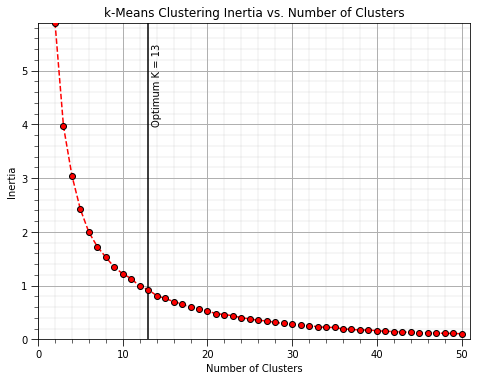

In [17]:
max_K = 50                                                    # maximum number of clusters, k
optimal_k = 13

inertia = []
for k in range(2,max_K+1):                                    # loop over number of clusters and store the inertia
    kmeans_iter = KMeans(n_clusters=k, random_state=14, n_init = 10).fit(df.loc[:,['Norm_Porosity','Norm_AI']].values)
    inertia.append(kmeans_iter.inertia_)

plt.scatter(range(2,max_K+1),inertia,c='red',edgecolor='black',zorder=10)
plt.plot(range(2,max_K+1),inertia,c='red',ls='--',zorder=1)
plt.xlim(2,max_K); plt.xlabel('Number of Clusters'); plt.ylabel('Inertia'); plt.ylim(bottom=0)
plt.vlines(optimal_k,0,np.max(inertia),color='black'); plt.annotate('Optimum K = ' + str(optimal_k),[optimal_k+0.5,4.0],rotation=90.0)
plt.grid(True); plt.title('k-Means Clustering Inertia vs. Number of Clusters')
plt.xlim([0,max_K+1]); plt.ylim([0, np.max(inertia)]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

* in this case there is a continuous change in gradient and not a clear elbow.

#### Silhouette Method

Description: The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.
How it works: Compute the silhouette score for each K value. The silhouette score ranges from -1 (poor fit) to +1 (good fit), where higher values indicate better clustering.
Interpretation: The optimal K corresponds to the highest average silhouette score.
Pros: Provides both cohesion and separation metrics.
Cons: Can be computationally expensive for large datasets.

The silhouette calculation proceeds as, for a given data point \(i\), the silhouette score is calculated using the following steps:

1. Calculate the **average distance within the same cluster**,

$$
a(i) = \frac{1}{|C_i| - 1} \sum_{j \in C_i, j \neq i} d(i, j)
$$

where, $C_i$ is the cluster containing point $i$, $d(i, j)$ is the Euclidean distance between points $i$ and $j$, and $C_i|$ is the number of points in the cluster $C_i$.

2. Calculate the **average distance to the nearest cluster**,

$$
b(i) = \min_{C_k \neq C_i} \left( \frac{1}{|C_k|} \sum_{j \in C_k} d(i, j) \right)
$$

where $C_k$ is any other cluster, different from the cluster $C_i$ that contains point $i$.

3. Calculate the **silhouette score for point $i$**,

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

where $s(i)$ is the silhouette score for point $i$, $a(i)$ is the average distance to points in the same cluster, $b(i)$ is the average distance to points in the nearest neighboring cluster.

4. Now over all points, calculate the **overall silhouette score**, the average silhouette score of all points,

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

where $n$ is the number of data points, $s(i)$ is the silhouette score of point $i$.

We interpret overall silhouette score values as,

- **+1**, the points on average are well clustered and far from neighboring clusters.
- **0**, the points on average are on or very close to the boundary between two clusters.
- **-1**, the points on average are likely assigned to the wrong cluster.

Now we repeat the overall silhouette score calculation on a range of $K$ values and select the maximium silhouette score case as the optimum $K$.

Advantages of the silhouette method include,

* The silhouette score provides an understanding of both the compactness and separation of clusters.

* Can be applied to any clustering algorithm, not just K-Means, i.e., the input is the data and cluster assignments.

The limitations of sihouette score include,

* The silhouette method is computationally expensive, especially for large datasets.
  
* It may not provide clear results for complex datasets with overlapping or irregularly shaped clusters.

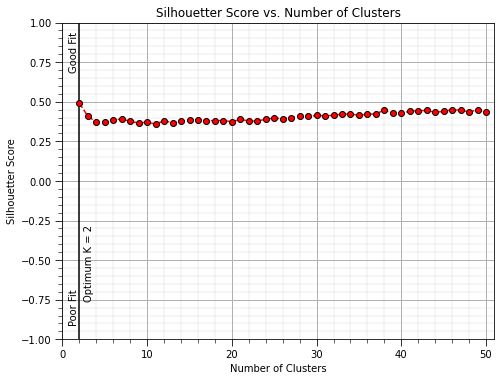

In [18]:
max_K = 50                                                    # maximum number of clusters, k

silhouette = []
for k in range(2,max_K+1):                                    # loop over number of clusters and store the inertia
    kmeans_iter = KMeans(n_clusters=k, random_state=14, n_init = 10).fit(df.loc[:,['Norm_Porosity','Norm_AI']].values)
    score = silhouette_score(df.loc[:,['Norm_Porosity','Norm_AI']].values, kmeans_iter.labels_)
    silhouette.append(score)
optimal_k = np.argmax(silhouette) + 2 

plt.scatter(range(2,max_K+1),silhouette,c='red',edgecolor='black',zorder=10)
plt.annotate('Good Fit',[0.8,0.7],rotation = 90); plt.annotate('Poor Fit',[0.8,-0.9],rotation = 90)
plt.plot(range(2,max_K+1),silhouette,c='red',ls='--',zorder=1)
plt.xlim(2,max_K); plt.xlabel('Number of Clusters'); plt.ylabel('Silhouetter Score'); plt.ylim(bottom=0)
plt.vlines(optimal_k,-1,1,color='black'); plt.annotate('Optimum K = ' + str(optimal_k),[optimal_k+0.5,-0.75],rotation=90.0)
plt.grid(True); plt.title('Silhouetter Score vs. Number of Clusters')
plt.xlim([0,max_K+1]); plt.ylim([-1,1]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

#### Clustering without Normalization / Standardization

One of the critical assumptions of clustering is that the variability is the same over each feature.

* an exception would be if the features have the same units and the variability differences are meaningful 

Let's take this dataset and draw it to scale (to show what a distance metric would see in original units.

* we rotate the plot and provide an approximate visualization with porosity 1 unit equal to permeability 1 unit on the plot

* effectively the dataset looks 1D to the clustering algorithm, difference in porosity becomes meaningless

Here's what our plot looks like with equal aspect ratio between the 2 features. 

* the plot becomes a line and the data does not show up properly.

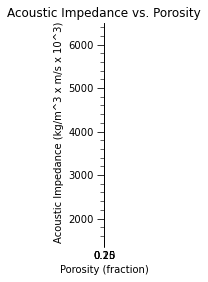

In [19]:
plt.subplot(121)                                              # scatter plot our training data 
plt.scatter(df_subset['Porosity'], df['AI'], c="black", alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('Acoustic Impedance vs. Porosity'); plt.xlabel('Porosity (fraction)'); plt.ylabel('Acoustic Impedance (kg/m^3 x m/s x 10^3)')
plt.xlim(por_min, por_max); plt.ylim(AI_min, AI_max); add_grid();
plt.gca().set_aspect('equal', adjustable='box')

Now let's repeat the previous k-means clustering, but with the original features (not normalized).

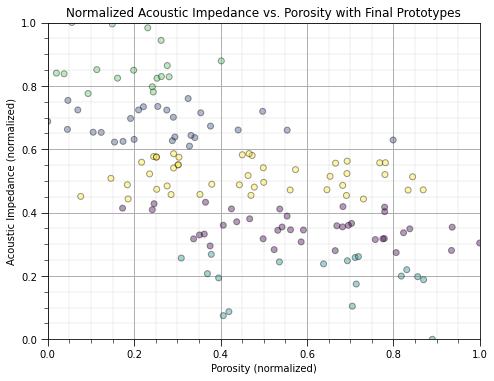

In [20]:
K = 5                                                         # number categories / clusters 

kmeans = KMeans(n_clusters=K, random_state=seed, n_init = 100).fit(df.loc[:,['Porosity','AI']]) # k-means clustering
df['kMeans_Orig'] = kmeans.labels_ + 1

plt.subplot(111)                                              # plot the training data and K prototypes
plt.scatter(df_subset['Norm_Porosity'], df['Norm_AI'], c=df['kMeans_Orig'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('Normalized Acoustic Impedance vs. Porosity with Final Prototypes'); plt.xlabel('Porosity (normalized)')
plt.ylabel('Acoustic Impedance (normalized)')
plt.xlim([0, 1]); plt.ylim([0, 1]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

The clusters are only in acoustic impedance since the differences in porosity on not significant due to the much larger range for the acoustic impedance feature.

* clusters are orthogonal to acoustic impedance

#### Comments

This was a basic treatment of cluster analysis. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
